In [27]:
path_1 = '/Users/quinhuonn/Downloads/TRB Dataset.xlsx'

In [28]:
import pandas as pd 
import numpy as np 

In [29]:
import matplotlib.pyplot as plt

In [30]:
pro_type = {
    'ProductKey': str
}
Product = pd.read_excel(path_1, sheet_name='Products', dtype = pro_type)
Product.dtypes

ProductKey              object
ProductAlternateKey     object
ProductName             object
ProductSubcategory      object
ProductCategoryName     object
StandardCost           float64
Color                   object
ListPrice              float64
Size                    object
SizeRange               object
Weight                 float64
ProductLine             object
Class                   object
Style                   object
ModelName               object
Description             object
dtype: object

In [31]:
type = {
    'CustomerKey': str
}
Customer = pd.read_excel(path_1, sheet_name='Customers', dtype= type)

In [32]:
Promotion = pd.read_excel(path_1, sheet_name='Promotion')

In [33]:
Order = pd.read_excel(path_1, sheet_name='Orders', dtype= data_type)
Order

,ProductKey,OrderDate,DueDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryCountry,SalesTerritoryGroup,SalesOrderNumber,SalesOrderLineNumber,UnitPrice,ProductStandardCost,SalesAmount,TaxAmt
0,310,2020-12-27,2021-01-08,2021-01-03,21768,1,United states,North America,SO43697,1,3936.09700,2388.42362,3936.09700,28.62616
1,346,2020-12-27,2021-01-08,2021-01-03,28389,1,Italy,Europe,SO43698,1,3739.98900,2103.36984,3739.98900,27.19992
2,346,2020-12-27,2021-01-08,2021-01-03,25863,1,Canada,North America,SO43699,1,3739.98900,2103.36984,3739.98900,27.19992
3,336,2020-12-27,2021-01-08,2021-01-03,14501,1,Canada,North America,SO43700,1,769.00802,454.46093,769.00802,5.59279
4,346,2020-12-27,2021-01-08,2021-01-03,11003,1,New Zealand,Pacific,SO43701,1,3739.98900,2103.36984,3739.98900,27.19992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,485,2024-01-27,2024-02-08,2024-02-03,15868,1,United states,North America,SO75122,1,24.17800,9.04255,24.17800,0.17584
60394,225,2024-01-27,2024-02-08,2024-02-03,15868,1,United states,North America,SO75122,2,9.88900,7.61453,9.88900,0.07192
60395,485,2024-01-27,2024-02-08,2024-02-03,18759,1,United states,North America,SO75123,1,24.17800,9.04255,24.17800,0.17584
60396,486,2024-01-27,2024-02-08,2024-02-03,18759,1,United states,North America,SO75123,2,174.90000,65.41260,174.90000,1.27200


In [34]:
data_type = {
    'ProductKey': str,
    'CustomerKey': str,
    'PromotionKey': str
}

## Correlation btw commute distance and sale amount

In [35]:
Scatter_plot = pd.merge(Order, Customer, on='CustomerKey', how= 'left')
merge= pd.merge(Scatter_plot, Product, on='ProductKey', how= 'left')
merge['CommuteDistance'].value_counts()


CommuteDistance
0-1 Miles     21307
5-10 Miles    10615
1-2 Miles     10170
2-5 Miles     10084
10+ Miles      8222
Name: count, dtype: int64

In [36]:
# Map commute distance strings to numeric values
distance_map = {
    '0-1 Miles': 0,
    '1-2 Miles': 1,
    '2-5 Miles': 2,
    '5-10 Miles': 5,
    '10+ Miles': 10
}
merge['Commute Distance Numeric'] = merge['CommuteDistance'].map(distance_map)
merge['Commute Distance Numeric']


0        10
1         0
2        10
3         1
4         5
         ..
60393     1
60394     1
60395     0
60396     0
60397     0
Name: Commute Distance Numeric, Length: 60398, dtype: int64

In [37]:
correlation = merge['Commute Distance Numeric'].corr(merge['SalesAmount'])
print("Correlation between Commute Distance and Sale Amount:", correlation)


Correlation between Commute Distance and Sale Amount: -0.02154508125597108


In [39]:
today_time = pd.to_datetime('2024-12-30')

RFM_df = Order.groupby('CustomerKey').agg({
    'ProductKey': 'count',
    'OrderDate': lambda o: (today_time - o.max()).days, 
    'SalesAmount': 'sum'
}
)
RFM_df

,ProductKey,OrderDate,SalesAmount
CustomerKey,,,
11000,8,608,9073.88900
11001,11,387,7022.26800
11002,4,677,8925.44400
11003,9,601,8953.21900
11004,6,610,9015.61100
...,...,...,...
29479,1,849,2254.00802
29480,5,533,2686.23300
29481,1,1237,3712.48900


In [40]:
RFM_df = RFM_df.rename(columns={
    'ProductKey': 'TotalOrder',
    'OrderDate': 'OrderDuration',
    'SalesAmount': 'TotalSpending'
})

# 1. CUSTOMER PERSONA (CHÂN DUNG KHÁCH HÀNG)

In [41]:
cus_behavior_df = pd.merge(RFM_df, Customer, on='CustomerKey')
cus_behavior_df


,CustomerKey,TotalOrder,OrderDuration,TotalSpending,Title,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,DateFirstPurchase,CommuteDistance
0,11000,8,608,9073.88900,NaN,Jon,Yang,1990-03-14 07:40:48,Married,Male,jon24@adventure-works.com,99000.0,2,0,Bachelors,Professional,Y,2021-01-17,1-2 Miles
1,11001,11,387,7022.26800,NaN,Eugene,Huang,1995-07-12 19:12:00,Single,Male,eugene10@adventure-works.com,66000.0,3,3,Bachelors,Professional,N,2021-01-13,0-1 Miles
2,11002,4,677,8925.44400,NaN,Ruben,Torres,1989-06-10 01:55:12,Married,Male,ruben35@adventure-works.com,66000.0,3,3,Bachelors,Professional,Y,2021-01-05,2-5 Miles
3,11003,9,601,8953.21900,NaN,Christy,Zhu,1992-05-08 19:12:00,Single,Female,christy12@adventure-works.com,77000.0,0,0,Bachelors,Professional,N,2016-12-27,5-10 Miles
4,11004,6,610,9015.61100,NaN,Elizabeth,Johnson,1999-04-13 22:04:48,Single,Female,elizabeth5@adventure-works.com,88000.0,5,5,Bachelors,Professional,Y,2021-01-21,1-2 Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,1,849,2254.00802,NaN,Tommy,Tang,1987-07-27 20:09:36,Married,Male,tommy2@adventure-works.com,33000.0,1,0,Graduate Degree,Clerical,Y,2022-09-03,0-1 Miles
18480,29480,5,533,2686.23300,NaN,Nina,Raji,1996-09-03 13:26:24,Single,Female,nina21@adventure-works.com,33000.0,3,0,Graduate Degree,Clerical,Y,2023-07-16,0-1 Miles
18481,29481,1,1237,3712.48900,NaN,Ivan,Suri,1982-12-10 17:16:48,Single,Male,ivan0@adventure-works.com,33000.0,3,0,Graduate Degree,Clerical,N,2021-08-11,0-1 Miles
18482,29482,1,835,2254.00802,NaN,Clayton,Zhang,1981-12-20 18:14:24,Married,Male,clayton0@adventure-works.com,33000.0,3,0,Bachelors,Clerical,Y,2022-09-17,0-1 Miles


## DEMOGRAPHIC: NHAN KHAU HOC

# a. AGE

In [ ]:
from datetime import datetime

# Convert 'BirthDate' to datetime format
cus_behavior_df['BirthDate'] = pd.to_datetime(cus_behavior_df['BirthDate'])

# Get today's date
today = datetime.today()

# Calculate age based on birthdate
cus_behavior_df['age'] = cus_behavior_df['BirthDate'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day))).astype(int)\
cus_behavior_df['age'].describe()

count    18484.000000
mean        37.467648
std         13.372492
min         18.000000
25%         27.000000
50%         35.000000
75%         46.000000
max         99.000000
Name: age, dtype: float64

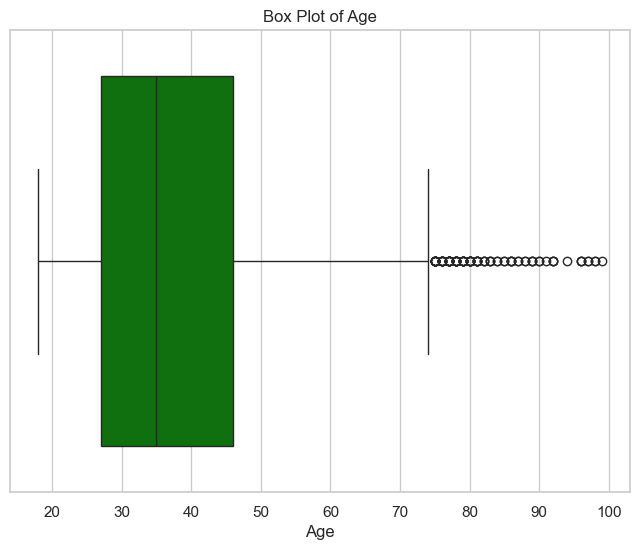

In [ ]:
import seaborn as sns
# Create a box plot for 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=cus_behavior_df['age'], color='olive')

# Add title and labels
plt.title('Box Plot of Age')
plt.xlabel('Age')

# Show the plot
plt.show()

## b. YEARLY INCOME 

In [ ]:
segment_persona_final['YearlyIncome'].describe()

count     18484.000000
mean      63036.355767
std       35514.425873
min       11000.000000
25%       33000.000000
50%       66000.000000
75%       77000.000000
max      187000.000000
Name: YearlyIncome, dtype: float64

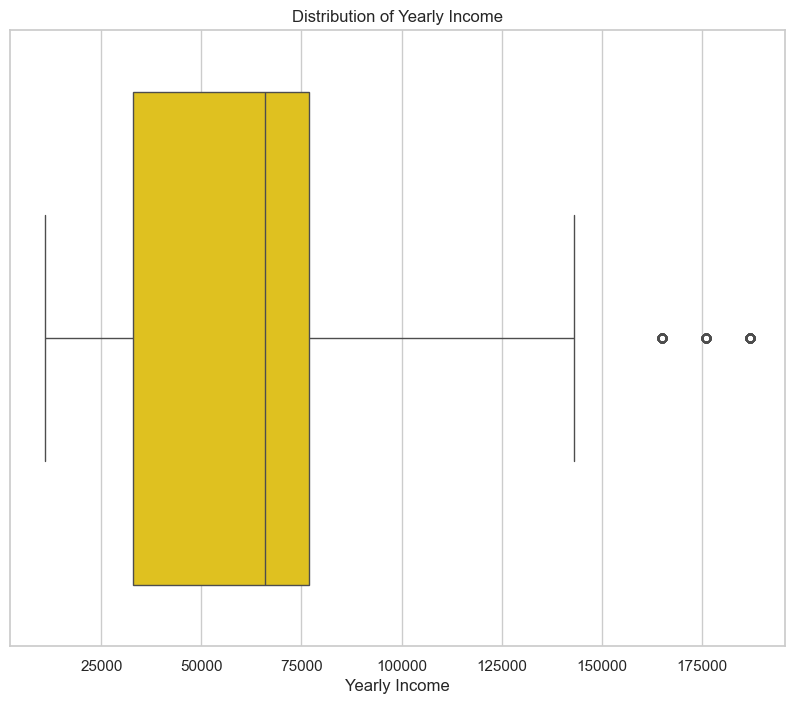

In [ ]:
#create box plot to visualize customer's yearly income 
plt.figure(figsize= (10,8))
sns.boxplot(x=cus_behavior_df['YearlyIncome'],color='gold')
plt.title('Distribution of Yearly Income')
plt.xlabel('Yearly Income')

plt.show()

In [42]:
col = ['CustomerKey', 'TotalOrder', 'OrderDuration', 'TotalSpending']
RFM_analysis = cus_behavior_df[col]
RFM_final = RFM_analysis.rename(columns={
                    'TotalOrder': 'Frequency',
                    'OrderDuration': 'Recency',
                    'TotalSpending': 'Monetary'}
                    )
RFM_final

,CustomerKey,Frequency,Recency,Monetary
0,11000,8,608,9073.88900
1,11001,11,387,7022.26800
2,11002,4,677,8925.44400
3,11003,9,601,8953.21900
4,11004,6,610,9015.61100
...,...,...,...,...
18479,29479,1,849,2254.00802
18480,29480,5,533,2686.23300
18481,29481,1,1237,3712.48900
18482,29482,1,835,2254.00802


## Count RFM score by assigning number 

In [43]:
bin_edge = [0, 0.2, 0.4, 0.6, 0.8, 1]
# Recency: Lower values get higher scores (since recent customers are better)
R_score = pd.qcut(RFM_final['Recency'], q=bin_edge, labels=[5, 4, 3, 2, 1], duplicates= 'drop').astype(int)

# Frequency & Spending: Higher values get higher scores
F_score = pd.qcut(RFM_final['Frequency'], q=bin_edge, labels= False,duplicates = 'drop')
M_score = pd.qcut(RFM_final['Monetary'], q=bin_edge, labels= False, duplicates= 'drop')

# Convert scores to integers
RFM_final['R_score'] = R_score.astype(int)
RFM_final['F_score'] = (F_score + 1).astype(int)
RFM_final['M_score'] = (M_score + 1).astype(int) #adding 1 value to make quartile start at 1 
#assign score into 1-5 to rank the customer segment

RFM_final

,CustomerKey,Frequency,Recency,Monetary,R_score,F_score,M_score
0,11000,8,608,9073.88900,2,4,5
1,11001,11,387,7022.26800,5,4,5
2,11002,4,677,8925.44400,1,3,5
3,11003,9,601,8953.21900,2,4,5
4,11004,6,610,9015.61100,2,4,5
...,...,...,...,...,...,...,...
18479,29479,1,849,2254.00802,1,1,4
18480,29480,5,533,2686.23300,3,4,4
18481,29481,1,1237,3712.48900,1,1,5
18482,29482,1,835,2254.00802,1,1,4


In [44]:
#calculating the RFM score by combining 3 quantile. 
RFM_final['RFM_score'] = RFM_final['R_score'] + RFM_final['F_score'] + RFM_final['M_score']
RFM_final

,CustomerKey,Frequency,Recency,Monetary,R_score,F_score,M_score,RFM_score
0,11000,8,608,9073.88900,2,4,5,11
1,11001,11,387,7022.26800,5,4,5,14
2,11002,4,677,8925.44400,1,3,5,9
3,11003,9,601,8953.21900,2,4,5,11
4,11004,6,610,9015.61100,2,4,5,11
...,...,...,...,...,...,...,...,...
18479,29479,1,849,2254.00802,1,1,4,6
18480,29480,5,533,2686.23300,3,4,4,11
18481,29481,1,1237,3712.48900,1,1,5,7
18482,29482,1,835,2254.00802,1,1,4,6


### SEGMENT CUSTOMER

Because TRB is consumer durable industry (high-value product), HIGH TRANSACTION VALUE AND LOW FREQUENCY:

In [45]:
cus_behavior_df= pd.merge(RFM_final, Customer, on='CustomerKey')
cus_behavior_df.head(20)

,CustomerKey,Frequency,Recency,Monetary,R_score,F_score,M_score,RFM_score,Title,FirstName,...,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,DateFirstPurchase,CommuteDistance
0,11000,8,608,9073.889,2,4,5,11,NaN,Jon,...,Male,jon24@adventure-works.com,99000.0,2,0,Bachelors,Professional,Y,2021-01-17,1-2 Miles
1,11001,11,387,7022.268,5,4,5,14,NaN,Eugene,...,Male,eugene10@adventure-works.com,66000.0,3,3,Bachelors,Professional,N,2021-01-13,0-1 Miles
2,11002,4,677,8925.444,1,3,5,9,NaN,Ruben,...,Male,ruben35@adventure-works.com,66000.0,3,3,Bachelors,Professional,Y,2021-01-05,2-5 Miles
3,11003,9,601,8953.219,2,4,5,11,NaN,Christy,...,Female,christy12@adventure-works.com,77000.0,0,0,Bachelors,Professional,N,2016-12-27,5-10 Miles
4,11004,6,610,9015.611,2,4,5,11,NaN,Elizabeth,...,Female,elizabeth5@adventure-works.com,88000.0,5,5,Bachelors,Professional,Y,2021-01-21,1-2 Miles
5,11005,6,609,8933.463,2,4,5,11,NaN,Julio,...,Male,julio1@adventure-works.com,77000.0,0,0,Bachelors,Professional,Y,2016-12-28,5-10 Miles
6,11006,5,597,8930.933,2,4,5,11,NaN,Janet,...,Female,janet9@adventure-works.com,77000.0,0,0,Bachelors,Professional,Y,2021-01-22,5-10 Miles
7,11007,8,653,9032.100,1,4,5,10,NaN,Marco,...,Male,marco14@adventure-works.com,66000.0,3,3,Bachelors,Professional,Y,2021-01-07,0-1 Miles
8,11008,7,670,8916.941,1,4,5,10,NaN,Rob,...,Female,rob4@adventure-works.com,66000.0,4,4,Bachelors,Professional,Y,2021-01-23,10+ Miles
9,11009,5,602,8900.463,2,4,5,11,NaN,Shannon,...,Male,shannon38@adventure-works.com,77000.0,0,0,Bachelors,Professional,N,2021-01-25,5-10 Miles


# KEY METRICS 1: RFM SCORE RECENCY - FREQENCY - MONEYTARY (assumped equal weight for 3 factors)
"Segment customers based on their spending habits"

1. RECENCY: "When was the last time they made a purchase
> Recency: How much time has elapsed since a customer’s last activity or transaction with the brand? Activity is usually a purchase, although variations are sometimes used, e.g., the last visit to a website or use of a mobile app. 

> Scoring from lowest to highest: 1-5 -> who is targeted at higher score will be likeyly to purchase recently (those who is 5-scored value purchased product lastest.) - score high in this dimension means lower purchased duration from now (30/12/2024)

> At Patch, we consider the duration beyond 365 days to be a potentially "churned" customer. 

<code> create rankin for Recency <code>
** ==> User buy something most recently are going to do it again **

| Recency          | Frequency               | Monetary             |
|------------------|-------------------------|----------------------|
| R-Tier-1 (least recent) | F-Tier-1 (only few transaction) | M-Tier-1 (lowest spend) |
| R-Tier-2         | F-Tier-2               | M-Tier-2             |
| R-Tier-3         | F-Tier-3               | M-Tier-3             |
| R-Tier-4  | F-Tier-4 (most transaction) | M-Tier-4  |
| R-Tier-5 (most recent) |  | M-Tier-5 (higest spend) |

In [46]:
col = ['CustomerKey', 'Recency', 'R_score']
recency_df = RFM_final[col]
df_sorted = recency_df.sort_values('Recency', ascending=True)
df_sorted

,CustomerKey,Recency,R_score
10523,21523,338,5
10524,21524,338,5
3114,14114,338,5
5170,16170,338,5
7178,18178,338,5
...,...,...,...
16666,27666,1456,1
16577,27577,1456,1
16612,27612,1459,1
16601,27601,1460,1


In [47]:
RFM_final['R_score'].value_counts()

R_score
5    3769
2    3712
3    3690
1    3680
4    3633
Name: count, dtype: int64

* CREATING FREQUENCY TABLE FOR R_SCORE: 
**The basket for 5-scored_recency customer is 20.39% out of total purchasing order time **

In [48]:
# Get value counts and convert to DataFrame
rscore_freq = RFM_final['R_score'].value_counts().sort_index().reset_index()
rscore_freq.columns = ['R_Score', 'Count']  # Rename columns

# Calculate RELATIVE percentage
rscore_freq['Percentage'] = (rscore_freq['Count'] / rscore_freq['Count'].sum()) * 100

print("Frequency Distribution of R_Score:")
display(rscore_freq)
rscore_freq

Frequency Distribution of R_Score:


,R_Score,Count,Percentage
0,1,3680,19.909111
1,2,3712,20.082233
2,3,3690,19.963211
3,4,3633,19.654837
4,5,3769,20.390608


,R_Score,Count,Percentage
0,1,3680,19.909111
1,2,3712,20.082233
2,3,3690,19.963211
3,4,3633,19.654837
4,5,3769,20.390608


> the shortest duration for customer orders is 338 days from now () and the longest purchasing time is 1464 days

> total count of 5_scored recency account for 21% of total overall

| Score     | Min edge        | Max-edge|  Percentage (%)
|-----------|-----------------|----------------------|
| 5         | 318             | 410     | 20.39%
| 4         | 411             | 470     | 19.65%
| 3         | 471             | 543     | 19.96%
| 2         | 544             | 625     | 20.08%
| 1         | 626             | 1464    | 19.91%



In [49]:
#Filter customer by score 
r5_customers = RFM_final[RFM_final['R_score'] == 5]
r5_customers['Recency'].max()
r5_customers

,CustomerKey,Frequency,Recency,Monetary,R_score,F_score,M_score,RFM_score
1,11001,11,387,7022.268,5,4,5,14
13,11013,5,345,125.356,5,4,3,12
19,11019,33,354,970.970,5,4,3,12
23,11023,6,352,134.464,5,4,3,12
47,11047,4,408,7240.563,5,3,5,13
...,...,...,...,...,...,...,...,...
18441,29441,3,372,75.867,5,2,2,9
18446,29446,3,396,39.897,5,2,1,8
18447,29447,2,371,26.158,5,1,1,7
18470,29470,3,392,66.517,5,2,2,9


2. FREQUENCY: how often they tend to purchase

> Rules: higher score -> more valuable customer

In [51]:
RFM_final['F_score'].value_counts()

F_score
1    7600
2    4622
4    3410
3    2852
Name: count, dtype: int64

In [52]:
# Get value counts and convert to DataFrame
Fscore_freq = RFM_final['F_score'].value_counts().sort_index().reset_index()
Fscore_freq.columns = ['F_Score', 'Count']  # Rename columns

# Calculate RELATIVE percentage
Fscore_freq['Percentage'] = (Fscore_freq['Count'] / Fscore_freq['Count'].sum()) * 100

print("Frequency Distribution of F_Score:")
display(Fscore_freq)

Frequency Distribution of F_Score:


,F_Score,Count,Percentage
0,1,7600,41.116641
1,2,4622,25.005410
2,3,2852,15.429561
3,4,3410,18.448388


In [53]:
f1_customers = RFM_final[RFM_final['F_score'] == 4]
f1_customers


,CustomerKey,Frequency,Recency,Monetary,R_score,F_score,M_score,RFM_score
0,11000,8,608,9073.88900,2,4,5,11
1,11001,11,387,7022.26800,5,4,5,14
3,11003,9,601,8953.21900,2,4,5,11
4,11004,6,610,9015.61100,2,4,5,11
5,11005,6,609,8933.46300,2,4,5,11
...,...,...,...,...,...,...,...,...
18403,29403,6,638,4391.13400,1,4,5,10
18412,29412,5,650,2939.06756,1,4,4,9
18432,29432,5,634,1438.04100,1,4,4,9
18462,29462,5,458,940.30200,4,4,3,11


# frequency scores: 
| Score     | Min edge        | Max-edge|  Percentage (%)
|-----------|-----------------|----------------------|
| #4         | 5               | 68      | 18%
| #3         | 4               | 4       | 15%
| #2         | 3               | 3       | 25%
| #1         | 1               | 2       | 41%



> 18% nhung thang mua lap lai hon 5 lan va mua toi da 68 lan trong khi co toi 41% trong so tong nhung thang tham gia mua tu 1-2 lan. 

> xem thu doanh thu cua cong ty thu loi duoc tu nhung thang nay. 

> Those customer which re-puchased more than 5 order is considered as a loyal customers 

> Chan dung cua customer group 1-scored based demographic: (chiem 41% ~ nearly a half)

In [56]:

# Group by RFM_score and sum the Total_Spending
rfm_summary = cus_behavior_df.groupby('RFM_score')['Monetary'].sum().reset_index()

# # Sort by Total_Spending descending (optional, for better cumulative % insight)
rfm_summary = rfm_summary.sort_values(by='Monetary', ascending=False)
rfm_summary

# # Calculate cumulative spending and % cumulative spending
rfm_summary['Cumulative_Spending'] = rfm_summary['Monetary'].cumsum()
rfm_summary['%_Cumulative_Spending'] = 100 * rfm_summary['Cumulative_Spending'] / rfm_summary['Monetary'].sum()

# print(rfm_summary)


In [ ]:
least_purchasing = pd.merge(cus_behavior_df, f1_customers, on='CustomerKey', how ='right' )
least_purchasing

,CustomerKey,Frequency_x,Recency_x,Monetary_x,R_score_x,F_score_x,M_score_x,RFM_score_x,Title,FirstName,...,HouseOwnerFlag,DateFirstPurchase,CommuteDistance,Frequency_y,Recency_y,Monetary_y,R_score_y,F_score_y,M_score_y,RFM_score_y
0,11020,2,733,2548.66700,1,1,4,6,NaN,Jordan,...,N,2022-12-28,1-2 Miles,2,733,2548.66700,1,1,4,6
1,11022,2,711,2554.50800,1,1,4,6,NaN,Ethan,...,Y,2023-01-19,5-10 Miles,2,711,2554.50800,1,1,4,6
2,11036,2,709,2590.47800,1,1,4,6,NaN,Jennifer,...,Y,2023-01-21,1-2 Miles,2,709,2590.47800,1,1,4,6
3,11053,2,714,2562.97800,1,1,4,6,NaN,Ana,...,N,2023-01-16,1-2 Miles,2,714,2562.97800,1,1,4,6
4,11064,2,706,2535.47800,1,1,4,6,NaN,Chase,...,Y,2023-01-24,5-10 Miles,2,706,2535.47800,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,29476,1,1260,3739.98900,1,1,5,7,NaN,Elizabeth,...,N,2021-07-19,0-1 Miles,1,1260,3739.98900,1,1,5,7
7596,29479,1,849,2254.00802,1,1,4,6,NaN,Tommy,...,Y,2022-09-03,0-1 Miles,1,849,2254.00802,1,1,4,6
7597,29481,1,1237,3712.48900,1,1,5,7,NaN,Ivan,...,N,2021-08-11,0-1 Miles,1,1237,3712.48900,1,1,5,7
7598,29482,1,835,2254.00802,1,1,4,6,NaN,Clayton,...,Y,2022-09-17,0-1 Miles,1,835,2254.00802,1,1,4,6


 **Because TRB is consumer durable industry (high-value product), HIGH TRANSACTION VALUE AND LOW FREQUENCY, Emphasize Recency and Monetary value over Frequency.**

### SEGMENT CUSTOMER: 

1. Loyal Customer: F -> 4, R -> 2,4; M -> 2,4 
> High R, F, low M
> Even if they are not on the highest plan, their repeated subscription renewals add up over time and result in high lifetime value.
<RF>
2. Most valuable Customer: R -> 4,5; F -> 3,4; M: 4,5
> High all
> Be on the highest plan, who buy frequently, recently, and spend a lot.
> could be a small group but bring up to ? revenue of all business (lots of revenue)

3. Potential Loyalists: R -> 4,5; F -> 1,2; M: 1,3
> Recent buyers with good spending but average frequency. 
> High R, High Mo, middle frequency

4. Bid spender (spend a lot but not high frequenct)

3. At-risk Customer:
> High F, high spending, low recency

4. New Customers: R -> 4,5, F ->1,2; M -> 1,3
> High RFM scorers but infrequent buyers. 

5. Churned Cutomer: 
> Low all.

In [57]:
# Segment customers
def segment_customer(row):
    if row['R_score'] >= 4 and row['F_score'] >= 3 and row['M_score'] >= 4: #min RFM_score = 11
        return 'Most valuable'
    elif row['F_score'] == 4 and row['R_score'] >= 4: #high in frequency and middle recency but maybe low in recency and low in spending. 
        return 'Loyal'
    elif row['M_score'] >= 4: #spend a lot no matter frequency or recency (can be low)
        return 'Big Spenders'
    elif row['R_score']  == 5  and row['F_score'] <= 2:
        return 'New Customers'
    elif row['R_score'] == 1 and row['F_score'] == 1 and row['M_score'] == 1:
        return 'Churned Customer'
    elif row['R_score'] <= 3 and row['F_score'] <= 2 and row['M_score'] <= 3: # max = 8, 
        return 'At Risk'
    else:
        return 'Others'

In [58]:
# Apply segmentation
RFM_final['Segment'] = RFM_final.apply(segment_customer, axis=1)
RFM_final['Segment'].value_counts()
RFM_final

,CustomerKey,Frequency,Recency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,11000,8,608,9073.88900,2,4,5,11,Big Spenders
1,11001,11,387,7022.26800,5,4,5,14,Most valuable
2,11002,4,677,8925.44400,1,3,5,9,Big Spenders
3,11003,9,601,8953.21900,2,4,5,11,Big Spenders
4,11004,6,610,9015.61100,2,4,5,11,Big Spenders
...,...,...,...,...,...,...,...,...,...
18479,29479,1,849,2254.00802,1,1,4,6,Big Spenders
18480,29480,5,533,2686.23300,3,4,4,11,Big Spenders
18481,29481,1,1237,3712.48900,1,1,5,7,Big Spenders
18482,29482,1,835,2254.00802,1,1,4,6,Big Spenders


In [ ]:
#Filter each segment 
Loyal = RFM_final[RFM_final['Segment'] =='Loyal']
Loyal


,CustomerKey,Frequency,Recency,Monetary,R_score,F_score,M_score,RFM_score,Segment
12,11012,5,443,89.386,4,4,2,10,Loyal
13,11013,5,345,125.356,5,4,3,12,Loyal
19,11019,33,354,970.970,5,4,3,12,Loyal
23,11023,6,352,134.464,5,4,3,12,Loyal
49,11049,5,429,89.386,4,4,2,10,Loyal
...,...,...,...,...,...,...,...,...,...
17686,28686,5,470,880.341,4,4,3,11,Loyal
18041,29041,5,372,691.295,5,4,3,12,Loyal
18243,29243,5,433,135.245,4,4,3,11,Loyal
18297,29297,5,449,674.795,4,4,3,11,Loyal


In [ ]:
# Get value counts and convert to DataFrame
segment_freq = RFM_final['Segment'].value_counts().sort_index().reset_index()
segment_freq.columns = ['Segment', 'Count']  # Rename columns

# Calculate RELATIVE percentage
segment_freq['Percentage'] = (Fscore_freq['Count'] / Fscore_freq['Count'].sum()) * 100

print("Frequency Distribution of F_Score:")
display(Fscore_freq)

### ANALYZING SEGMENT
> Viewing spending (sale revenue) of each segment 

> Identify churned risks.

In [ ]:
# Viewing spending (sale revenue) of each segment: 
segment_analysis = RFM_final.groupby('Segment').agg({
    'CustomerKey': 'count',
    'Monetary': 'mean'
}).rename(columns={
    'CustomerKey': 'Customer Count', 'Monetary': 'Average Spending'
}).sort_values('Average Spending', ascending= False).round(3)
segment_analysis

,Customer Count,Average Spending
Segment,,
Most valuable,1584,4891.457
Big Spenders,5789,3883.150
Loyal,757,227.791
Others,3898,220.498
At Risk,4631,185.749
New Customers,1070,145.965
Churned Customer,755,24.631


In [ ]:
# percentage of Count Customer by each segment.
segment_analysis['%Per Count of CustomerKey'] = (segment_analysis['Customer Count']/ segment_analysis['Customer Count'].sum()) *100 
segment_analysis[['%Per Count of CustomerKey', 'Customer Count']]

,%Per Count of CustomerKey,Customer Count
Segment,,
Most valuable,8.569574,1584
Big Spenders,31.318979,5789
Loyal,4.095434,757
Others,21.088509,3898
At Risk,25.054101,4631
New Customers,5.788790,1070
Churned Customer,4.084614,755


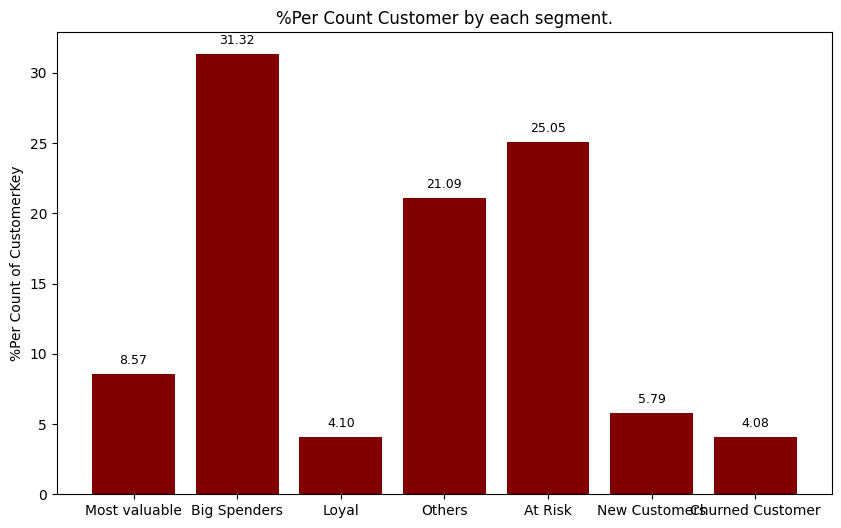

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot: % Count of CustomerKey by each segment 
bars = ax1.bar(segment_analysis.index, segment_analysis['%Per Count of CustomerKey'], color='maroon', label='%Per Count of CustomerKey')
ax1.set_ylabel('%Per Count of CustomerKey')
ax1.set_title('%Per Count Customer by each segment.')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

# % count of CustomerKey by segment and % Total speding by segment. 
> "Most valuable" segment chiem 8.57% nhung dong gop ~24% cho tong Sale revenue 

> "Big Spender" segment chiem proportion cao nhat va dong gop cho total revenue nhieu nhat, gan nhu 70%.

> "Loyal" segment la nhung customer re-purchase >= 5 lan va thuc hien nhung lan mua gan day nhat. 
==> chiem 4.10% tren tong so khach hang va dong gop negligible total revenue 0.53% 
make sense - boi vi TRB la durable goods, co ca phu kien (gia thap) -> phan tich cac mat hang san phan duoc segment nay lua chon. 

> "At risk" segment chiem ti le kha cao trong tong so customer 1/4 tren tong so khach hang - day la nhung khach hang mua hang nhieu lan mot thoi gian kha lau <=3 nhung van co gia tri (low value) -  dong gop 2.66% tren tong doanh thu cua cua hang (dung top 3 can chu y de giu nhung khach hang nay o lai).

> "Churned Customer" chiem 4.08% tong so khach va dong gop 0.06% tren tong doanh thu. 


In [ ]:
# Calculate total spending per segment
total_spending = RFM_final.groupby('Segment').agg({'Monetary': 'sum'}).round(3)

# Join the total spending into segment_analysis
segment_analysis['Total Spending'] = total_spending['Monetary']

In [ ]:
# percentage of total spending by each segment.
segment_analysis['%Per Sum of Spending by segment'] = (segment_analysis['Total Spending']/ segment_analysis['Total Spending'].sum()) *100 
segment_analysis[['%Per Sum of Spending by segment', 'Total Spending']]

,%Per Sum of Spending by segment,Total Spending
Segment,,
Most valuable,23.991879,7.748068e+06
Big Spenders,69.607906,2.247956e+07
Loyal,0.533954,1.724381e+05
Others,2.661445,8.595017e+05
At Risk,2.663614,8.602020e+05
New Customers,0.483617,1.561821e+05
Churned Customer,0.057583,1.859622e+04


In [ ]:
segment_analysis['% Cummulated Sum of Spending by segment'] = segment_analysis['%Per Sum of Spending by segment'].cumsum().round(2)

/var/folders/fs/vpv7t9012wxdx__nwt82lmpm0000gn/T/ipykernel_76028/2449865176.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


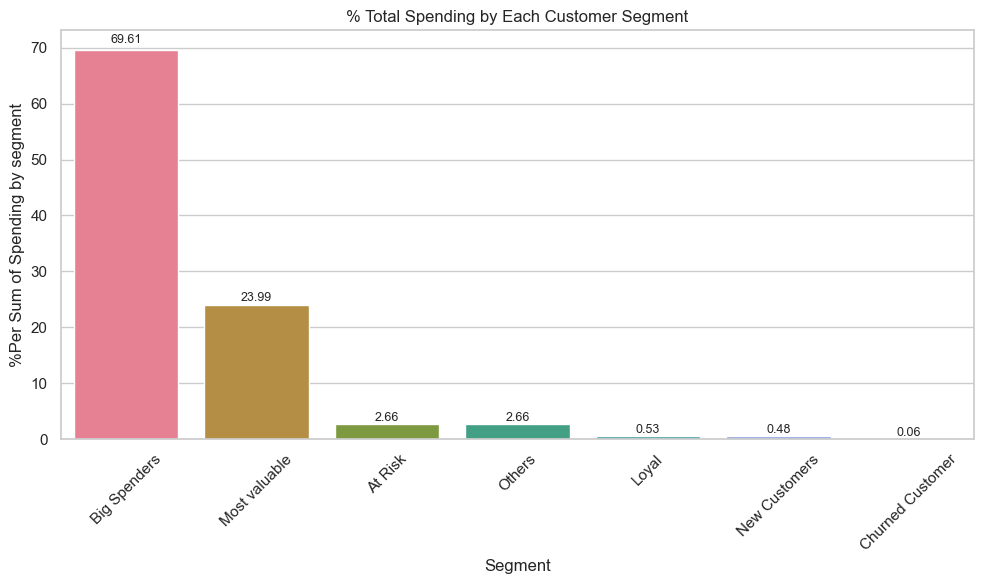

In [ ]:
import seaborn as sns

# Prepare sorted data for clearer visualization (optional)
segment_sorted = segment_analysis.sort_values('%Per Sum of Spending by segment', ascending=False).reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='Segment', 
    y='%Per Sum of Spending by segment', 
    data=segment_sorted, 
    palette='husl'
)

# Add labels on top of bars
for i, value in enumerate(segment_sorted['%Per Sum of Spending by segment']):
    plt.text(i, value + value * 0.01, f'{value:,.2f}', ha='center', va='bottom', fontsize=9)

# Labels and title
plt.ylabel('%Per Sum of Spending by segment')
plt.title('% Total Spending by Each Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Calculating average overal RFM scores by each customer segment:
Overall_RFM = RFM_final.groupby('Segment').agg({
    'RFM_score': 'mean'
}).sort_values('RFM_score', ascending= False).round(2)
Overall_RFM

,RFM_score
Segment,
Most valuable,12.73
Loyal,11.47
Big Spenders,9.24
Others,8.21
New Customers,7.55
At Risk,5.38
Churned Customer,3.00


**ta co the thay 'Most valuable"'s average spending chiem ti le cao nhat trong tat ca cac tep khach hang, trung binh $4891, chiem 51, 06% trong tong so revenue cua TBR**

In [ ]:
segment_analysis['%Per average of spending'] = (segment_analysis['Average Spending']/ segment_analysis['Average Spending'].sum()) *100 
segment_analysis['Cummulated %Per average of spending'] = segment_analysis['percen of average spending'].cumsum().round(2)
segment_analysis[['%Per average of spending', 'Cummulated %Per average of spending']]
segment_analysis[['Customer Count','%Per Sum of Spending by segment', '%Per average of spending']]

,Customer Count,%Per Sum of Spending by segment,%Per average of spending
Segment,,,
Most valuable,1584,23.991879,51.063096
Big Spenders,5789,69.607906,40.537137
Loyal,757,0.533954,2.377965
Others,3898,2.661445,2.301832
At Risk,4631,2.663614,1.939078
New Customers,1070,0.483617,1.523764
Churned Customer,755,0.057583,0.257129


In [ ]:
segment_analysis['Cummulated %Per average of spending'] = segment_analysis['percen of average spending'].cumsum().round(2)

**Most valuable customers have few customern so total spending  which is attributed to revenue overall is less than those for big spender but thay tend to spend much more than average**

> Most valueable chi chiem 8.57% tong so khach hang nhung dong gop toi 23.99% tong doanh thu trong khi nhung thang customer dang o trang thai "at risk" chiem toi 25.05% nhung chi dong gop 2.66% va chi trung binh cho 1.99% tren trung binh so tien bo ra cho san pham

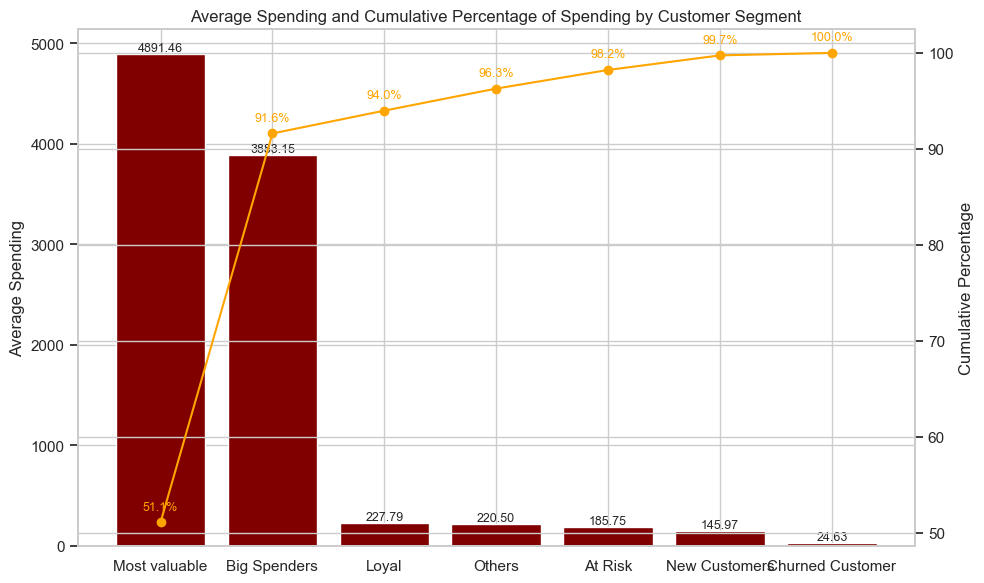

buc tranh toan canh tuong tu voi trung binh so tien ma moi segment bo ra cho san pham cua TBR 

**> 91.6% trung binh doanh thu den tu nhom khac hang "most valuable" and "big spenders" (RFL_score overall >= 10)**

In [64]:

# Match segment to each customer to find final customer persona for each segment. 
segment_persona_final = pd.merge(cus_behavior_df, RFM_final, on='CustomerKey', how ='right')

#Retrive table
pd.DataFrame(segment_persona_final).to_csv('Customer_analysis.csv', index=False)

# 2. PRODUCT BY EACH SEGMENT. 

In [65]:
# Finding the best selling product by all customer 
product_performance = pd.merge(Order, Product, on='ProductKey', how ='left' )

product_performance

,ProductKey,OrderDate,DueDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryCountry,SalesTerritoryGroup,SalesOrderNumber,SalesOrderLineNumber,...,Color,ListPrice,Size,SizeRange,Weight,ProductLine,Class,Style,ModelName,Description
0,310,2020-12-27,2021-01-08,2021-01-03,21768,1,United states,North America,SO43697,1,...,Red,3936.09700,62,60-62 CM,15.00,R,H,Unisex,Road-150,This bike is ridden by race winners. Developed...
1,346,2020-12-27,2021-01-08,2021-01-03,28389,1,Italy,Europe,SO43698,1,...,Silver,3739.98900,44,42-46 CM,21.13,M,H,Unisex,Mountain-100,Top-of-the-line competition mountain bike. Per...
2,346,2020-12-27,2021-01-08,2021-01-03,25863,1,Canada,North America,SO43699,1,...,Silver,3739.98900,44,42-46 CM,21.13,M,H,Unisex,Mountain-100,Top-of-the-line competition mountain bike. Per...
3,336,2020-12-27,2021-01-08,2021-01-03,14501,1,Canada,North America,SO43700,1,...,Black,769.00802,62,60-62 CM,20.00,R,L,Unisex,Road-650,Value-priced bike with many features of our to...
4,346,2020-12-27,2021-01-08,2021-01-03,11003,1,New Zealand,Pacific,SO43701,1,...,Silver,3739.98900,44,42-46 CM,21.13,M,H,Unisex,Mountain-100,Top-of-the-line competition mountain bike. Per...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,485,2024-01-27,2024-02-08,2024-02-03,15868,1,United states,North America,SO75122,1,...,NaN,24.17800,NaN,NaN,NaN,M,NaN,NaN,Fender Set - Mountain,Clip-on fenders fit most mountain bikes.
60394,225,2024-01-27,2024-02-08,2024-02-03,15868,1,United states,North America,SO75122,2,...,Multi,9.88900,NaN,NaN,NaN,S,NaN,Unisex,Cycling Cap,Traditional style with a flip-up brim; one-siz...
60395,485,2024-01-27,2024-02-08,2024-02-03,18759,1,United states,North America,SO75123,1,...,NaN,24.17800,NaN,NaN,NaN,M,NaN,NaN,Fender Set - Mountain,Clip-on fenders fit most mountain bikes.
60396,486,2024-01-27,2024-02-08,2024-02-03,18759,1,United states,North America,SO75123,2,...,NaN,174.90000,NaN,NaN,NaN,M,NaN,NaN,All-Purpose Bike Stand,Perfect all-purpose bike stand for working on ...


In [66]:
product_performance['ProductKey'].value_counts()

ProductKey
477    4244
480    3191
528    3095
529    2376
214    2230
       ... 
320      19
332      18
322      17
340      17
324      16
Name: count, Length: 158, dtype: int64

In [69]:
data = {
    'ProductKey': str
}

In [ ]:
product_by_segment = pd.merge(product_performance, segment_persona_final, on='CustomerKey', how ='left')
key_col = ['ProductKey', 'OrderDate', 'CustomerKey', 'ProductName', 'ProductSubcategory', 'ProductCategoryName', 'Segment', 'SalesAmount']
product_by_segment_analyse = product_by_segment[key_col]
product_by_segment_analyse

TypeError: merge() got an unexpected keyword argument 'dtype'

In [68]:
#removing any neccessary duplicates if one identical transaction (Product name) is recorded by the same person (CustomerID) more than two at the same time (OrderDate)
product_by_segment_clean = product_by_segment_analyse.drop_duplicates(subset=['CustomerKey', 'ProductName', 'OrderDate'])
product_by_segment_clean

,ProductKey,OrderDate,CustomerKey,ProductName,ProductSubcategory,ProductCategoryName,Segment,SalesAmount
0,310,2020-12-27,21768,"Road-150 Red, 62",Road Bikes,Bikes,Big Spenders,3936.09700
1,346,2020-12-27,28389,"Mountain-100 Silver, 44",Mountain Bikes,Bikes,Big Spenders,3739.98900
2,346,2020-12-27,25863,"Mountain-100 Silver, 44",Mountain Bikes,Bikes,Big Spenders,3739.98900
3,336,2020-12-27,14501,"Road-650 Black, 62",Road Bikes,Bikes,Big Spenders,769.00802
4,346,2020-12-27,11003,"Mountain-100 Silver, 44",Mountain Bikes,Bikes,Big Spenders,3739.98900
...,...,...,...,...,...,...,...,...
60393,485,2024-01-27,15868,Fender Set - Mountain,Fenders,Accessories,Loyal,24.17800
60394,225,2024-01-27,15868,AWC Logo Cap,Caps,Clothing,Loyal,9.88900
60395,485,2024-01-27,18759,Fender Set - Mountain,Fenders,Accessories,Loyal,24.17800
60396,486,2024-01-27,18759,All-Purpose Bike Stand,Bike Stands,Accessories,Loyal,174.90000


**have total 7 rows duplicates (minimal - could be ignored)**

In [ ]:
#top selling product count 
product_by_segment_clean[['ProductKey', 'ProductName']].value_counts().head(20)

ProductKey  ProductName            
477         Water Bottle - 30 oz.      4243
480         Patch Kit/8 Patches        3191
528         Mountain Tire Tube         3095
529         Road Tire Tube             2374
214         Sport-100 Helmet, Red      2230
225         AWC Logo Cap               2190
222         Sport-100 Helmet, Blue     2124
485         Fender Set - Mountain      2121
217         Sport-100 Helmet, Black    2085
478         Mountain Bottle Cage       2025
479         Road Bottle Cage           1712
530         Touring Tire Tube          1487
537         HL Mountain Tire           1396
536         ML Mountain Tire           1161
538         LL Road Tire               1044
541         Touring Tire                935
539         ML Road Tire                926
484         Bike Wash - Dissolver       908
535         LL Mountain Tire            862
540         HL Road Tire                856
Name: count, dtype: int64

In [ ]:
product_by_segment_clean.groupby('ProductName')['CustomerKey'].nunique().reset_index().sort_values(by='CustomerKey', ascending=False).head(20)

,ProductName,CustomerKey
126,Water Bottle - 30 oz.,4073
23,Mountain Tire Tube,2960
52,Patch Kit/8 Patches,2950
56,Road Tire Tube,2226
101,"Sport-100 Helmet, Red",2147
0,AWC Logo Cap,2132
6,Fender Set - Mountain,2110
100,"Sport-100 Helmet, Blue",2050
99,"Sport-100 Helmet, Black",2024
22,Mountain Bottle Cage,2004


Top 1: Product Key = 477, Total Order Count = 4243 times -but- Total distinct Customer Count = 4073 customers ==> 170 times of re-purchased orders were made by more than 1 customer

Top 2: Product Key = 480, Total Order Count = 3191 times -but- Total distinct Customer Count = 2950 customers ==> 240 times of re-purchased orders were made by one of total person (most quality or sastified customer's needs)

Top 3: Product Key = 528, Total Order Count = 3095 times -but- Total distinct Customer Count = 2960 customers ==> 135 times of re-purchased orders were made by one of total person

...

Lower top: Product Key = 322, 340, 324; Total Order Count = Total distinct Customer Count  ==> No one re-purchased those products again ==> <code> one-time purchased product <code>

## a. Top 1 selling product by all segment

In [ ]:
top_product_overall = (
    product_by_segment_clean.groupby('ProductKey')['SalesAmount']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print("Top products overall:")
print(top_product_overall.head(10))  # top 5


Top products overall:
  ProductKey  SalesAmount
0        312  1326464.689
1        310  1322528.592
2        313  1188701.294
3        314  1161148.615
4        311  1106043.257
5        361  1077956.803
6        353  1076939.358
7        363  1057760.891
8        359  1050187.424
9        357  1023347.589


## b. Top selling products by each segment 

In [ ]:
top_product_by_segment = (
    product_by_segment_clean.groupby(['Segment', 'ProductSubcategory'])['SalesAmount']
    .sum()
    .reset_index()
)

# Get top product per segment
top_per_segment = (
    top_product_by_segment.sort_values(['Segment', 'SalesAmount'], ascending=[True, False])
    .groupby('Segment')
    .head(10)
)

print("Top products by segment:")
print(top_per_segment)


Top products by segment:
     Segment ProductSubcategory   SalesAmount
11   At Risk         Road Bikes  487926.59839
15   At Risk      Touring Bikes   80841.91500
14   At Risk    Tires and Tubes   61315.01200
10   At Risk     Mountain Bikes   51973.60300
7    At Risk            Helmets   44955.15200
..       ...                ...           ...
102   Others            Jerseys   46758.55800
105   Others             Shorts   17245.53600
94    Others        Bike Stands   14866.50000
95    Others  Bottles and Cages   14750.02100
98    Others            Fenders   12427.49200

[68 rows x 3 columns]


In [ ]:
pd.DataFrame(product_by_segment_clean).to_csv('Product.csv', index=False)

# 3. REVENUE, PROFIT, STANDARD OF PRODUCT

In [ ]:
Order['Profit'] = Order['SalesAmount'] - Order['ProductStandardCost'] - Order['TaxAmt']
Order

,ProductKey,OrderDate,DueDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryCountry,SalesTerritoryGroup,SalesOrderNumber,SalesOrderLineNumber,UnitPrice,ProductStandardCost,SalesAmount,TaxAmt,Profit
0,310,2020-12-27,2021-01-08,2021-01-03,21768,1,United states,North America,SO43697,1,3936.09700,2388.42362,3936.09700,28.62616,1519.04722
1,346,2020-12-27,2021-01-08,2021-01-03,28389,1,Italy,Europe,SO43698,1,3739.98900,2103.36984,3739.98900,27.19992,1609.41924
2,346,2020-12-27,2021-01-08,2021-01-03,25863,1,Canada,North America,SO43699,1,3739.98900,2103.36984,3739.98900,27.19992,1609.41924
3,336,2020-12-27,2021-01-08,2021-01-03,14501,1,Canada,North America,SO43700,1,769.00802,454.46093,769.00802,5.59279,308.95430
4,346,2020-12-27,2021-01-08,2021-01-03,11003,1,New Zealand,Pacific,SO43701,1,3739.98900,2103.36984,3739.98900,27.19992,1609.41924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,485,2024-01-27,2024-02-08,2024-02-03,15868,1,United states,North America,SO75122,1,24.17800,9.04255,24.17800,0.17584,14.95961
60394,225,2024-01-27,2024-02-08,2024-02-03,15868,1,United states,North America,SO75122,2,9.88900,7.61453,9.88900,0.07192,2.20255
60395,485,2024-01-27,2024-02-08,2024-02-03,18759,1,United states,North America,SO75123,1,24.17800,9.04255,24.17800,0.17584,14.95961
60396,486,2024-01-27,2024-02-08,2024-02-03,18759,1,United states,North America,SO75123,2,174.90000,65.41260,174.90000,1.27200,108.21540


In [ ]:
#Highlight needed column for this metric 
col = ['OrderDate', 'SalesTerritoryCountry', 'SaleTerritoryGroup', 'ProductStandardCost', 'Sale']

In [ ]:
pd.DataFrame(Order).to_csv('Order.csv', index=False)

In [ ]:
Order['SalesTerritoryCountry'].value_counts()

SalesTerritoryCountry
Canada           21344
New Zealand      13345
United states     7620
Spain             6906
Belgium           5625
Italy             5558
Name: count, dtype: int64

In [ ]:
# Compute correlation
correlation = Order['SalesAmount'].corr(Order['TaxAmt'])
Orde

# 4. UNIT PRICE

In [ ]:
price_segment = pd.merge(Order, Product, on= 'ProductKey', how= 'left')
column = ['ProductKey', 'CustomerKey', 'ProductName', 'ProductSubcategory', 'ListPrice', 'SalesAmount']
price_segment[column].sort_values(by='ProductKey', ascending= False)

,ProductKey,CustomerKey,ProductName,ProductSubcategory,ListPrice,SalesAmount
27091,606,26890,"Road-750 Black, 52",Road Bikes,593.989,593.989
50237,606,23857,"Road-750 Black, 52",Road Bikes,593.989,593.989
24768,606,26931,"Road-750 Black, 52",Road Bikes,593.989,593.989
5764,606,29356,"Road-750 Black, 52",Road Bikes,593.989,593.989
55521,606,21921,"Road-750 Black, 52",Road Bikes,593.989,593.989
...,...,...,...,...,...,...
15182,214,16951,"Sport-100 Helmet, Red",Helmets,38.489,38.489
37274,214,11544,"Sport-100 Helmet, Red",Helmets,38.489,38.489
15166,214,11566,"Sport-100 Helmet, Red",Helmets,38.489,38.489
43309,214,23800,"Sport-100 Helmet, Red",Helmets,38.489,38.489


In [ ]:
price_segment['ListPrice'].describe()

count    60398.000000
mean       534.695602
std       1021.338881
min          2.519000
25%          8.745000
50%         32.989000
75%        593.989000
max       3936.097000
Name: ListPrice, dtype: float64

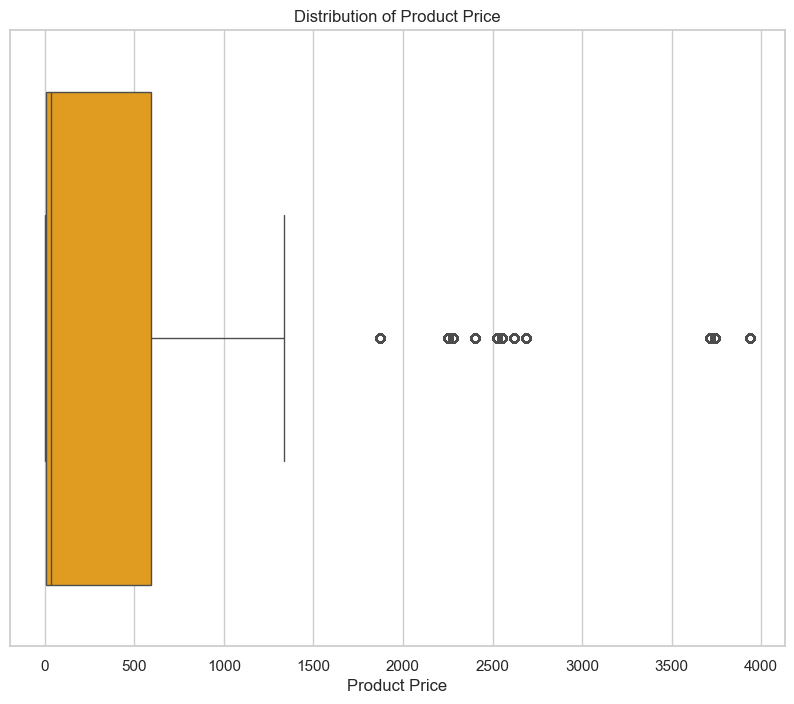

In [ ]:
#create box plot to visualize customer's yearly income 
plt.figure(figsize= (10,8))
sns.boxplot(x=price_segment['ListPrice'],color='orange')
plt.title('Distribution of Product Price')
plt.xlabel('Product Price')

plt.show()

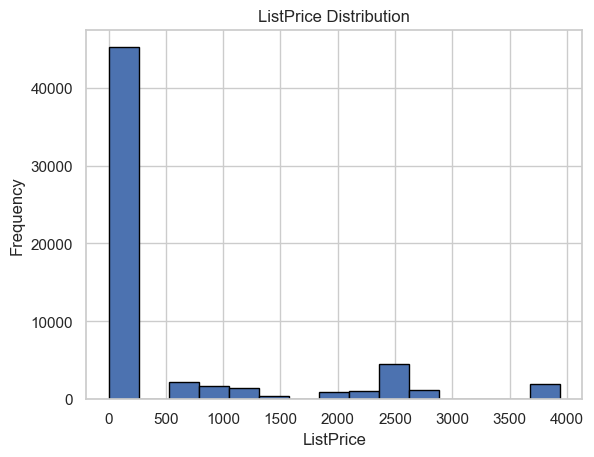

In [ ]:
#create histogram 
plt.hist(price_segment['ListPrice'], bins=15, edgecolor='black')
plt.title('ListPrice Distribution')
plt.xlabel('ListPrice')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Bin your price 
price_segment['Price_Segment'] = pd.cut(price_segment['ListPrice'], bins=[0,33,590,1300,float('inf')],
                             labels=['Low-end','Mid-range','High-end','Premium'])
column_2 = ['ProductKey', 'CustomerKey', 'ProductName','ListPrice', 'SalesAmount', 'Price_Segment']
price_segment[column_2]

,ProductKey,CustomerKey,ProductName,ListPrice,SalesAmount,Price_Segment
0,310,21768,"Road-150 Red, 62",3936.09700,3936.09700,Premium
1,346,28389,"Mountain-100 Silver, 44",3739.98900,3739.98900,Premium
2,346,25863,"Mountain-100 Silver, 44",3739.98900,3739.98900,Premium
3,336,14501,"Road-650 Black, 62",769.00802,769.00802,High-end
4,346,11003,"Mountain-100 Silver, 44",3739.98900,3739.98900,Premium
...,...,...,...,...,...,...
60393,485,15868,Fender Set - Mountain,24.17800,24.17800,Low-end
60394,225,15868,AWC Logo Cap,9.88900,9.88900,Low-end
60395,485,18759,Fender Set - Mountain,24.17800,24.17800,Low-end
60396,486,18759,All-Purpose Bike Stand,174.90000,174.90000,Mid-range
